# 0x01. Classification
<hr>

Importing libraries:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
#from sklearn.linear_model import LogisticRegression
#from sklearn import metrics
#from sklearn.metrics import jaccard_similarity_score, mean_squared_error, classification_report
#from sklearn.model_selection import train_test_split
#from sklearn import preprocessing
#import pandas as pd
%matplotlib inline

console commands for the .py files:

In [2356]:
#!cp 6-neuron.py 7-neuron.py
#!touch 15-main.py 15-neural_network.py

In [2357]:
!chmod +x *.py

In [2775]:
!pycodestyle 15-neural_network.py

15-neural_network.py:136:13: E265 block comment should start with '# '
15-neural_network.py:146:80: E501 line too long (91 > 79 characters)
15-neural_network.py:171:24: E712 comparison to True should be 'if cond is True:' or 'if cond:'
15-neural_network.py:180:18: E712 comparison to True should be 'if cond is True:' or 'if cond:'


0. Class Neuron
<hr>
Define a single neuron performing binary classification

In [2561]:
class Neuron():
    """ Class Neuron """

    def __init__(self, nx):
        """ Constractor """
        
        # nx: number of input features to the neuron
        if type(nx) is not int:
            raise TypeError("nx must be an integer")
        if nx < 1:
            raise ValueError("nx must be a positive integer")
        self.nx = nx
        # weights vector for the neuron
        self.__W = np.random.randn(1, self.nx)
        # bias for the neuron
        self.__b = 0
        # activated output of the neuron (prediction)
        self.__A = 0

    @property
    def W(self):
        """ weights getter """
        return self.__W

    @property
    def b(self):
        """ bias getter """
        return self.__b

    @property
    def A(self):
        """ active output getter """
        return self.__A

    def forward_prop(self, X):
        """
            Calculate the forward 
            propagation of the neuron
            using sigmoid activation function
        """

        x = np.matmul(self.__W, X) + self.b
        self.__A = (1/(1+np.exp(-x))) #sigmoid
        return self.__A

    def cost(self, Y, A):
        """ Calculate the cost of the model using logistic regression """
        
        m = Y.shape[1]
        s = np.sum(Y * np.log(A) + (1 - Y) * np.log(1.0000001 - A)) 
        return -(1 / m) * s

    def evaluate(self, X, Y):
        """ Evaluate the neuron’s predictions """
        self.__A = self.forward_prop(X)
        cost = self.cost(Y, self.__A)
        self.__A = np.where(self.__A >= 0.5, 1, 0)
        return (self.__A, cost)
    
    def gradient_descent(self, X, Y, A, alpha=0.05):
        """ Calculate one pass of gradient descent on the neuron """
        # The Mean Error
        ME = np.mean((self.__A - Y))
        # update bias
        self.__b += ME * -alpha
        # update weights
        m = X.shape[1]
        x = A - Y
        xlr = -alpha/m * X.T
        self.__W = np.add(self.__W, np.matmul(x, xlr))
    
    def train(self, X, Y, iterations=5000, alpha=0.05, verbose=True, graph=True, step=2):
        """ train the neuron """
        # check iterations validity
        if type(iterations) is not int:
            raise TypeError('iterations must be an integer')
        if iterations < 0:
            raise ValueError('iterations must be a positive integer')
        # check alpha validity
        if type(alpha) is not float:
            raise TypeError('alpha must be a float')
        if alpha < 0:
            raise ValueError('alpha must be positive')
        # check step validity
        if (verbose or graph) is True:
            if type(step) is not int:
                raise TypeError('step must be an integer')
            if step < 0 or step > iterations:
                raise ValueError('step must be positive and <= iterations')
        # train the model
        costs = []
        k = 0
        for i in range(iterations):
            A = self.forward_prop(X)
            self.gradient_descent(X, Y, A, alpha)
            costs.append(self.cost(Y, A))
            if verbose == True and i-1 == k-1:
                print("Cost after {} iterations: {}".format(i, costs[i]))
                k += step
        # evaluation of the training data after iterations
        self.__A, cost = self.evaluate(X, Y)
        # last iteration
        i += 1
        print("Cost after {} iterations: {}".format(i, cost))
        # ploting
        if graph == True:
            plt.plot(costs)
            plt.xlabel('iteration')
            plt.ylabel('cost')
            plt.title('Training Cost')
            plt.show()
        # return the evaluation
        return (self.__A, cost)


Cost after 0 iterations: 4.365104944262272
Cost after 2 iterations: 3.5869624384776335
Cost after 4 iterations: 2.876311081433731
Cost after 6 iterations: 2.264127765243902
Cost after 8 iterations: 1.766268897280983
Cost after 10 iterations: 1.380507715544795


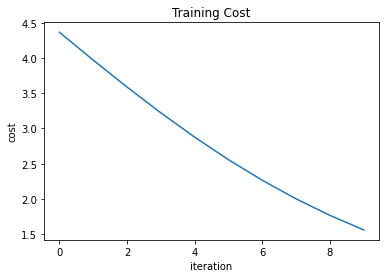

Train cost: 1.380507715544795
Train accuracy: 64.73746545598105%
Dev cost: 1.409619450741883
Dev accuracy: 64.49172576832152%


In [2562]:
# main 7
lib_train = np.load('Binary_Train.npz')
X_train_3D, Y_train = lib_train['X'], lib_train['Y']
X_train = X_train_3D.reshape((X_train_3D.shape[0], -1)).T
lib_dev = np.load('Binary_Dev.npz')
X_dev_3D, Y_dev = lib_dev['X'], lib_dev['Y']
X_dev = X_dev_3D.reshape((X_dev_3D.shape[0], -1)).T

np.random.seed(0)
neuron = Neuron(X_train.shape[0])
A, cost = neuron.train(X_train, Y_train, iterations=10)
accuracy = np.sum(A == Y_train) / Y_train.shape[1] * 100
print("Train cost:", cost)
print("Train accuracy: {}%".format(accuracy))
A, cost = neuron.evaluate(X_dev, Y_dev)
accuracy = np.sum(A == Y_dev) / Y_dev.shape[1] * 100
print("Dev cost:", cost)
print("Dev accuracy: {}%".format(accuracy))

In [246]:
verbose = False
graph = False
(verbose or graph) is True

False

In [240]:
s = ""
t = "34571422595"
t2 = "3"
for i in range(len(t)-1):
    n2 = int(t[i+1]) + 1
    t2 += str(n2)
    
    n = int(t2[i]) - 1
    s += str(n)
s, t2

('2457142250', '356825336106')

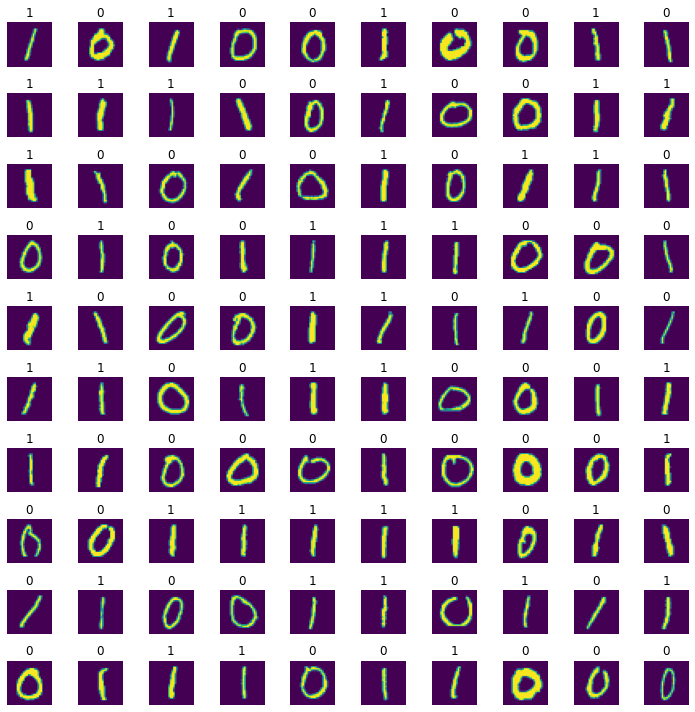

In [160]:
fig = plt.figure(figsize=(10, 10))
for i in range(100):
    fig.add_subplot(10, 10, i + 1)
    plt.imshow(X_dev_3D[i])
    plt.title(A[0, i])
    plt.axis('off')
plt.tight_layout()
plt.show()

In [1081]:
#main 0
lib_train = np.load('Binary_Train.npz')
X_3D, Y = lib_train['X'], lib_train['Y']
X = X_3D.reshape((X_3D.shape[0], -1)).T

np.random.seed(0)
neuron = Neuron(X.shape[0])
print(neuron.W)
print(neuron.W.shape)
print(neuron.b)
print(neuron.A)
neuron.A = 10
print(neuron.A)

[[ 1.76405235  0.40015721  0.97873798  2.2408932   1.86755799 -0.97727788
   0.95008842 -0.15135721 -0.10321885  0.4105985   0.14404357  1.45427351
   0.76103773  0.12167502  0.44386323  0.33367433  1.49407907 -0.20515826
   0.3130677  -0.85409574 -2.55298982  0.6536186   0.8644362  -0.74216502
   2.26975462 -1.45436567  0.04575852 -0.18718385  1.53277921  1.46935877
   0.15494743  0.37816252 -0.88778575 -1.98079647 -0.34791215  0.15634897
   1.23029068  1.20237985 -0.38732682 -0.30230275 -1.04855297 -1.42001794
  -1.70627019  1.9507754  -0.50965218 -0.4380743  -1.25279536  0.77749036
  -1.61389785 -0.21274028 -0.89546656  0.3869025  -0.51080514 -1.18063218
  -0.02818223  0.42833187  0.06651722  0.3024719  -0.63432209 -0.36274117
  -0.67246045 -0.35955316 -0.81314628 -1.7262826   0.17742614 -0.40178094
  -1.63019835  0.46278226 -0.90729836  0.0519454   0.72909056  0.12898291
   1.13940068 -1.23482582  0.40234164 -0.68481009 -0.87079715 -0.57884966
  -0.31155253  0.05616534 -1.16514984 

AttributeError: can't set attribute

In [1082]:

lib_train = np.load('Binary_Train.npz')
X_3D, Y = lib_train['X'], lib_train['Y']
X = X_3D.reshape((X_3D.shape[0], -1)).T

np.random.seed(0)
neuron = Neuron(X.shape[0])
print(neuron.W)
print(neuron.b)
print(neuron.A)
neuron.A = 10
print(neuron.A)


[[ 1.76405235  0.40015721  0.97873798  2.2408932   1.86755799 -0.97727788
   0.95008842 -0.15135721 -0.10321885  0.4105985   0.14404357  1.45427351
   0.76103773  0.12167502  0.44386323  0.33367433  1.49407907 -0.20515826
   0.3130677  -0.85409574 -2.55298982  0.6536186   0.8644362  -0.74216502
   2.26975462 -1.45436567  0.04575852 -0.18718385  1.53277921  1.46935877
   0.15494743  0.37816252 -0.88778575 -1.98079647 -0.34791215  0.15634897
   1.23029068  1.20237985 -0.38732682 -0.30230275 -1.04855297 -1.42001794
  -1.70627019  1.9507754  -0.50965218 -0.4380743  -1.25279536  0.77749036
  -1.61389785 -0.21274028 -0.89546656  0.3869025  -0.51080514 -1.18063218
  -0.02818223  0.42833187  0.06651722  0.3024719  -0.63432209 -0.36274117
  -0.67246045 -0.35955316 -0.81314628 -1.7262826   0.17742614 -0.40178094
  -1.63019835  0.46278226 -0.90729836  0.0519454   0.72909056  0.12898291
   1.13940068 -1.23482582  0.40234164 -0.68481009 -0.87079715 -0.57884966
  -0.31155253  0.05616534 -1.16514984 

AttributeError: can't set attribute

In [1083]:
lib_train = np.load('Binary_Train.npz')
X_3D, Y = lib_train['X'], lib_train['Y']
X = X_3D.reshape((X_3D.shape[0], -1)).T

np.random.seed(0)
neuron = Neuron(X.shape[0])
neuron._Neuron__b = 1
A = neuron.forward_prop(X)
if (A is neuron.A):
    print(A)


[[0.         0.00072463 0.00000045 ... 0.00008757 0.00000113 0.65579993]]


In [1084]:
lib_train = np.load('Binary_Train.npz')
X_3D, Y = lib_train['X'], lib_train['Y']
X = X_3D.reshape((X_3D.shape[0], -1)).T

np.random.seed(0)
neuron = Neuron(X.shape[0])
A = neuron.forward_prop(X)
cost = neuron.cost(Y, A)
print(cost)

4.365104944262272


In [800]:
lib_train = np.load('Binary_Train.npz')
X_3D, Y = lib_train['X'], lib_train['Y']
X = X_3D.reshape((X_3D.shape[0], -1)).T

np.random.seed(0)
neuron = Neuron(X.shape[0])
A, cost = neuron.evaluate(X, Y)
print(A, A.shape)
print(cost)

[[0 0 0 ... 0 0 0]] (1, 12665)
4.365104944262272


In [1085]:
lib_train = np.load('Binary_Train.npz')
X_3D, Y = lib_train['X'], lib_train['Y']
X = X_3D.reshape((X_3D.shape[0], -1)).T

np.random.seed(0)
neuron = Neuron(X.shape[0])
A = neuron.forward_prop(X)
neuron.gradient_descent(X, Y, A, 0.5)
print(neuron.b)
print(neuron.W)

0.2579495783615682
[[ 1.76405235  0.40015721  0.97873798  2.2408932   1.86755799 -0.97727788
   0.95008842 -0.15135721 -0.10321885  0.4105985   0.14404357  1.45427351
   0.76103773  0.12167502  0.44386323  0.33367433  1.49407907 -0.20515826
   0.3130677  -0.85409574 -2.55298982  0.6536186   0.8644362  -0.74216502
   2.26975462 -1.45436567  0.04575852 -0.18718385  1.53277921  1.46935877
   0.15494743  0.37816252 -0.88778575 -1.98079647 -0.34791215  0.15634897
   1.23029068  1.20237985 -0.38732682 -0.30230275 -1.04855297 -1.42001794
  -1.70625817  1.95079081 -0.5096499  -0.4380743  -1.25279536  0.77749036
  -1.61389785 -0.21274028 -0.89546656  0.3869025  -0.51080514 -1.18063218
  -0.02818223  0.42833187  0.06651722  0.3024719  -0.63432209 -0.36274117
  -0.67246045 -0.35955316 -0.81314628 -1.7262826   0.17742614 -0.40178094
  -1.63018517  0.46280831 -0.90725077  0.05212487  0.72936918  0.12933298
   1.13961474 -1.23475337  0.4023694  -0.68477107 -0.8707879  -0.57884966
  -0.31155253  0.05

In [1086]:
m = X.shape[1]
n = X.shape[0]
alpha = 0.5
neuron._Neuron5__b = 0
b = 0
np.random.seed(0)
w = np.random.randn(1, X.shape[0]) #neuron._Neuron5__W
A = neuron.forward_prop(X)
def sigmoid_der(x):
    return x * (1 - x)
cost = neuron.cost(Y, A)
in_o = np.matmul(weights, X) + b
b = 0
print(b)
i = 0
#A, cost = neuron.evaluate(X, Y)
# The mean error
ME = np.mean((A - Y))
# variance
var = np.var(A)
b = abs(ME) * alpha
MSE = np.square(np.subtract(A, Y)).mean() 
#np.set_printoptions(suppress=True)
k = (np.dot(X.T, ME)) * alpha
x = A - Y
xlr = -alpha/m * X.T
w = np.add(w, np.matmul(x, xlr))
#w

0


In [1087]:
lib_train = np.load('Binary_Train.npz')
X_train_3D, Y_train = lib_train['X'], lib_train['Y']
X_train = X_train_3D.reshape((X_train_3D.shape[0], -1)).T
lib_dev = np.load('Binary_Dev.npz')
X_dev_3D, Y_dev = lib_dev['X'], lib_dev['Y']
X_dev = X_dev_3D.reshape((X_dev_3D.shape[0], -1)).T
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_dev.shape,  Y_dev.shape)

Train set: (784, 12665) (1072,)
Test set: (784, 2115) (1, 2115)


In [1088]:
np.random.seed(0)
neuron = Neuron(X_train.shape[0])
A, cost = neuron.evaluate(X_dev, Y_dev)
print(A.shape, X.shape, Y.shape, neuron._Neuron__W.shape, cost)
A, cost = neuron.train(X_train, Y_train, iterations=20)
#print(classification_report(Y_train, A))

(1, 2115) (784, 12665) (1, 12665) (1, 784) 4.4667426589977035


Cost after 0 iterations: 4.365104944262272
Cost after 1 iterations: 3.9697407443195614
Cost after 2 iterations: 3.5869624384776335
Cost after 3 iterations: 3.2210589173498008
Cost after 4 iterations: 2.876311081433731
Cost after 5 iterations: 2.5564542957694685
Cost after 6 iterations: 2.264127765243902
Cost after 7 iterations: 2.0006725032037926
Cost after 8 iterations: 1.766268897280983
Cost after 9 iterations: 1.5600929664122525
Train cost: 1.380507715544795
Train accuracy: 64.73746545598105%
Dev cost: 1.409619450741883
Dev accuracy: 64.49172576832152%


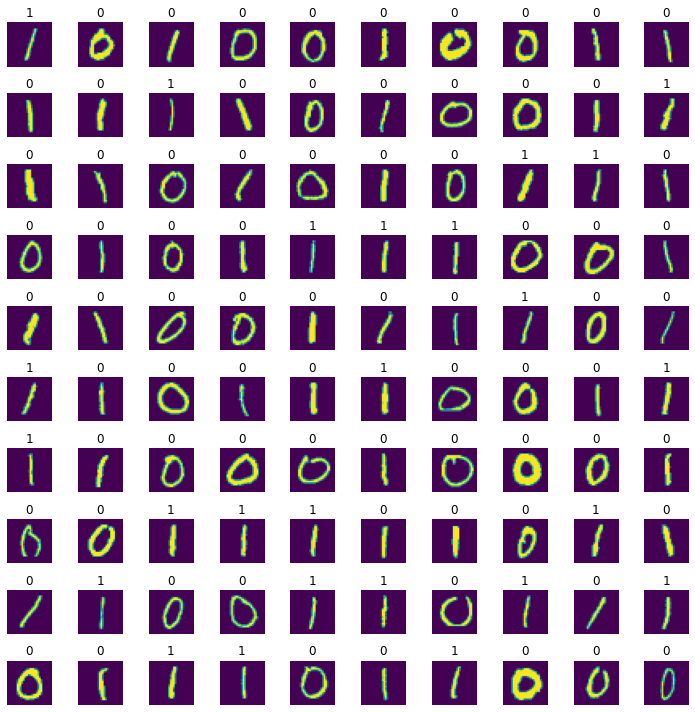

In [71]:
np.random.seed(0)
neuron = Neuron(X_train.shape[0])
#A, cost = neuron.evaluate(X_dev, Y_dev)
A, cost = neuron.train(X_train, Y_train, iterations=10)
accuracy = np.sum(A == Y_train) / Y_train.shape[1] * 100
print("Train cost:", cost)
print("Train accuracy: {}%".format(accuracy))
A, cost = neuron.evaluate(X_dev, Y_dev)
accuracy = np.sum(A == Y_dev) / Y_dev.shape[1] * 100
print("Dev cost:", cost)
print("Dev accuracy: {}%".format(accuracy))
fig = plt.figure(figsize=(10, 10))
for i in range(100):
    fig.add_subplot(10, 10, i + 1)
    plt.imshow(X_dev_3D[i])
    plt.title(A[0, i])
    plt.axis('off')
plt.tight_layout()
plt.show()

In [2558]:
Y

array([[0, 1, 1, ..., 1, 0, 1]])

Train cost: 2.2109041655100437
Train accuracy: 64.18476115278327%
Dev cost: 2.175111223982319
Dev accuracy: 65.91016548463357%

Train cost: 1.545957101482635
Train accuracy: 61.61073825503356%
Dev cost: 1.542761043856265
Dev accuracy: 61.938534278959814%

Train cost: 1.6475684822054086
Train accuracy: 62.581918673509676%
Dev cost: 1.6389356277718645
Dev accuracy: 63.07328605200946%

In [2769]:
""" nn """
import numpy as np
import matplotlib.pyplot as plt


class NeuralNetwork():
    """ Class Neuron """

    def __init__(self, nx, nodes):
        """ Constractor """
        
        # nx: number of input features to the neuron
        if type(nx) is not int:
            raise TypeError("nx must be an integer")
        if nx < 1:
            raise ValueError("nx must be a positive integer")
        self.nx = nx
        # nodes: number of nodes found in the hidden layer
        if type(nodes) is not int:
            raise TypeError("nodes must be an integer")
        if nodes < 1:
            raise ValueError("nodes must be a positive integer")
        # weights vector for the hidden layer
        self.__W1 = np.random.randn(nodes, self.nx)
        # bias for the hidden layer
        self.__b1 = np.array([[0]]* nodes)
        # activated output of the hidden layer
        self.__A1 = 0

        # weights vector for the neuron
        self.__W2 = np.random.randn(1, nodes)
        # bias for the neuron
        self.__b2 = 0
        # activated output of the neuron (prediction)
        self.__A2 = 0

    # the hidden layer
    @property
    def W1(self):
        """ weights getter """
        return self.__W1

    @property
    def b1(self):
        """ bias getter """
        return self.__b1

    @property
    def A1(self):
        """ active output getter """
        return self.__A1

    # the neuron
    @property
    def W2(self):
        """ weights getter """
        return self.__W2

    @property
    def b2(self):
        """ bias getter """
        return self.__b2

    @property
    def A2(self):
        """ active output getter """
        return self.__A2
    
    def sigmoid(self, X=None, w=None, b=None, x=None):
        """ sigmoid function """
        if (x is None):
            x = np.matmul(w, X)
            x = np.add(x, b)
        return (1/(1+np.exp(-x)))

    def dsigm(self, x):
        """ sigmoid derivative """
        return self.sigmoid(x=x) * (1-self.sigmoid(x=x))
        #return (np.exp(-x)/(1+np.exp(-x)**2))

    def forward_prop(self, X):
        """
            Calculate the forward 
            propagation of the neuron
            using sigmoid activation function
        """
        
        # layer active output
        self.__A1 = self.sigmoid(X, self.W1, self.b1)
        # neuron active output
        self.__A2 = self.sigmoid(self.__A1, self.W2, self.b2)

        return (self.A1, self.A2)

    def cost(self, Y, A):
        """ Calculate the cost of the model using logistic regression """

        m = Y.shape[1]
        s = np.sum(Y * np.log(A) + (1 - Y) * np.log(1.0000001 - A)) 
        return -(1 / m) * s

    def evaluate(self, X, Y):
        """ Evaluate the neuron’s predictions """
        _, self.__A2 = self.forward_prop(X)
        cost = self.cost(Y, self.__A2)
        self.__A2 = np.where(self.__A2 >= 0.5, 1, 0)
        return (self.__A2, cost)
    
    def gradient_descent(self, X, Y, A1, A2, alpha=0.05):
        """ Calculate one pass of gradient descent on the neuron """
        m = X.shape[1]
        n = A1.shape[0]
        
        def wUpdate(X, A, w, n=1):
            """ update weight """
            x = A - Y
            xlr = (-alpha*n/(m)) * X.T
            return np.add(w, np.matmul(x, xlr))
        
        # update weights
        # hidden layer
        self.__W1 = wUpdate(X, A1, self.W1)
        # neuron
        self.__W2 = wUpdate(self.A1, A2, self.W2, n)
        
        # update bias
        # hidden layer
        ME = np.mean((Y-A1), axis=1) # Mean Error
        t = []
        for i in range(n):
            #a = (ME[i] * -alpha)
            a = ME[i] * -alpha
            t.append([a])
        t = np.array(t)
        self.__b1 = np.add(self.b1, t) 

        # neuron
        ME = np.mean(A2 - Y) # Mean Error
        # update bias
        self.__b2 += ME * -alpha

    def train(self, X, Y, iterations=5000, alpha=0.05, verbose=True, graph=True, step=1):
        """ train the neuron """
        # check iterations validity
        if type(iterations) is not int:
            raise TypeError('iterations must be an integer')
        if iterations < 0:
            raise ValueError('iterations must be a positive integer')
        # check alpha validity
        if type(alpha) is not float:
            raise TypeError('alpha must be a float')
        if alpha < 0:
            raise ValueError('alpha must be positive')
        # check step validity
        if (verbose or graph) is True:
            if type(step) is not int:
                raise TypeError('step must be an integer')
            if step < 0 or step > iterations:
                raise ValueError('step must be positive and <= iterations')
        # train the model
        costs = []
        k = 0
        for i in range(iterations):
            A1, A2 = self.forward_prop(X)
            self.gradient_descent(X, Y, A1, A2, alpha)
            costs.append(self.cost(Y, A2))
            if verbose == True and i-1 == k-1:
                print("Cost after {} iterations: {}".format(i, costs[i]))
                k += step
        # evaluation of the training data after iterations
        self.__A2, cost = self.evaluate(X, Y)
        # last iteration
        i += 1
        print("Cost after {} iterations: {}".format(i, cost))
        # ploting
        if graph == True:
            plt.plot(costs)
            plt.xlabel('iteration')
            plt.ylabel('cost')
            plt.title('Training Cost')
            plt.show()
        # return the evaluation
        return (self.__A2, cost)

    

In [2766]:
lib_train = np.load('Binary_Train.npz')
X_3D, Y = lib_train['X'], lib_train['Y']
X = X_3D.reshape((X_3D.shape[0], -1)).T

np.random.seed(0)
nn = NeuralNetwork(X.shape[0], 3)


In [2767]:
A1, A2 = nn.forward_prop(X)
nn.gradient_descent(X, Y, A1, A2, 0.5)
print(nn.b1)
print(nn.b2)
print(nn.W1)
print(nn.W2)

[[-0.25794958]
 [ 0.13456849]
 [-0.12620886]]
0.15552508881941937
[[ 1.76405235  0.40015721  0.97873798 ...  0.52130375  0.61192719
  -1.34149673]
 [ 0.47689837  0.14844958  0.52904524 ...  0.0960042  -0.0451133
   0.07912172]
 [ 0.85053068 -0.83912419 -1.01177408 ... -0.07223876  0.31112445
  -1.07836109]]
[[ 1.07431539 -0.81471683 -1.78541935]]


In [2738]:
def sigmoid(x):
    """ sigmoid function """
    return (1/(1+np.exp(-x)))

def dsigm(x):
    """ sigmoid derivative """
    d = (np.exp(-x)/(1+np.exp(-x)**2))
    return d
def dcost(x, a):
    return 2/n * (a - x)
b = nn.b1
w = nn.W1
x = A1 - Y
xlr = -alpha/(m) * X.T
ww = np.add(w, np.matmul(x, xlr))
x = np.mean((Y-A1)**2, axis=1)
ww


array([[ 1.76405235,  0.40015721,  0.97873798, ...,  0.52130375,
         0.61192719, -1.34149673],
       [ 0.47689837,  0.14844958,  0.52904524, ...,  0.0960042 ,
        -0.0451133 ,  0.07912172],
       [ 0.85053068, -0.83912419, -1.01177408, ..., -0.07223876,
         0.31112445, -1.07836109]])

Cost after 0 iterations: 0.7917984405648548
Cost after 1 iterations: 0.7898592786041831
Cost after 2 iterations: 0.7918025438406109
Cost after 3 iterations: 0.796890461288707
Cost after 4 iterations: 0.8043198712985221
Cost after 5 iterations: 0.8131570376943261
Cost after 6 iterations: 0.8223822048891717
Cost after 7 iterations: 0.8310218414443029
Cost after 8 iterations: 0.8382799691288828
Cost after 9 iterations: 0.843562034117246
Cost after 10 iterations: 0.8464702205408013
Cost after 11 iterations: 0.8468399814322777
Cost after 12 iterations: 0.8447270585878683
Cost after 13 iterations: 0.8403217924953696
Cost after 14 iterations: 0.8338748904920744
Cost after 15 iterations: 0.8256657781926786
Cost after 16 iterations: 0.8159891345845619
Cost after 17 iterations: 0.8051426153356909
Cost after 18 iterations: 0.7934143240949966
Cost after 19 iterations: 0.7810717129066064
Cost after 20 iterations: 0.768353374928485
Cost after 21 iterations: 0.7554645486500556
Cost after 22 iteration

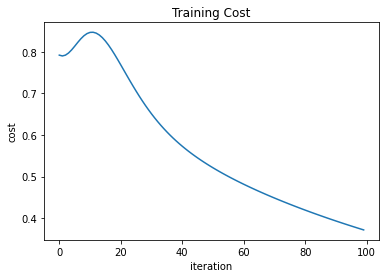

Train cost: 0.36939709582701613
Train accuracy: 94.78089222266087%
Dev cost: 0.36350444017645045
Dev accuracy: 95.0354609929078%


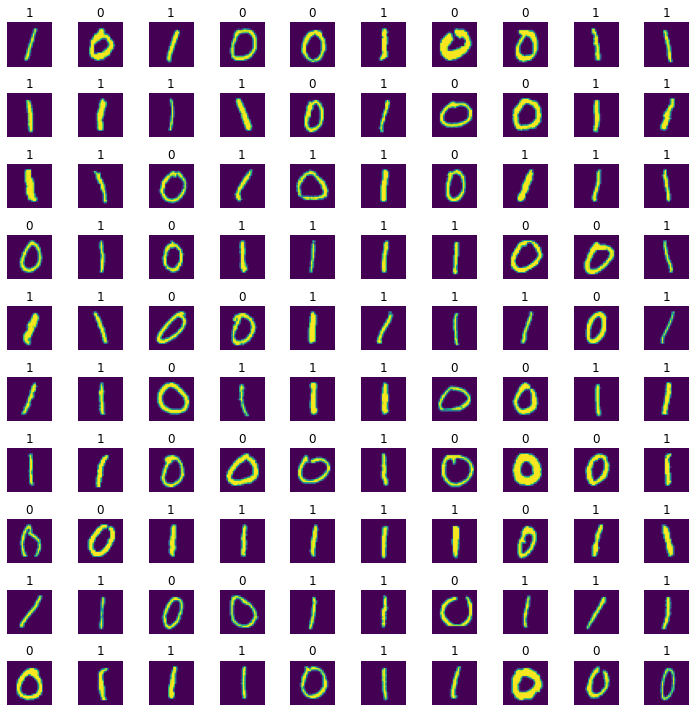

In [2770]:
lib_train = np.load('Binary_Train.npz')
X_train_3D, Y_train = lib_train['X'], lib_train['Y']
X_train = X_train_3D.reshape((X_train_3D.shape[0], -1)).T
lib_dev = np.load('Binary_Dev.npz')
X_dev_3D, Y_dev = lib_dev['X'], lib_dev['Y']
X_dev = X_dev_3D.reshape((X_dev_3D.shape[0], -1)).T

np.random.seed(0)
nn = NeuralNetwork(X.shape[0], 3)
A, cost = nn.train(X_train, Y_train, iterations=100)
accuracy = np.sum(A == Y_train) / Y_train.shape[1] * 100
print("Train cost:", cost)
print("Train accuracy: {}%".format(accuracy))
A, cost = nn.evaluate(X_dev, Y_dev)
accuracy = np.sum(A == Y_dev) / Y_dev.shape[1] * 100
print("Dev cost:", cost)
print("Dev accuracy: {}%".format(accuracy))
fig = plt.figure(figsize=(10, 10))
for i in range(100):
    fig.add_subplot(10, 10, i + 1)
    plt.imshow(X_dev_3D[i])
    plt.title(A[0, i])
    plt.axis('off')
plt.tight_layout()
plt.show()

In [2449]:
#for x in ME:
    #x = x.mean()
    #self.__b1.T[i] = np.add(self.__b1.T[i], x.mean() * -alpha)
    #print((self.__W[i][0]).mean()**0.5)
    #print(x.mean() -  dsigm(ME.mean()) * -alpha)
    #print((self.__W1.shape, self.__W2.shape))
    #i += 1

In [2519]:
A1, A2 = nn.forward_prop(X)
nn.gradient_descent(X, Y, A1, A2, 0.5)
print(nn.W1)
print(nn.b1)
print(nn.W2)
print(nn.b2)
#A1.shape, A2.shape
#49.46987929732263 * 0.003193, nn.W1.shape, nn.W2.shape

[[ 1.76405235  0.40015721  0.97873798 ...  0.52130375  0.61192719
  -1.34149673]
 [ 0.47689837  0.14844958  0.52904524 ...  0.0960042  -0.0451133
   0.07912172]
 [ 0.85053068 -0.83912419 -1.01177408 ... -0.07223876  0.31112445
  -1.07836109]]
[[8.03806234]
 [2.49706411]
 [7.62699491]]
[[4.2446282  2.39123745 1.62262497]]
-3.692081870217346


[[ 0.003193  ]
 [-0.01080922]
 [-0.01045412]]

In [1852]:
m = X.shape[1]
n = A1.shape[0]
alpha = 0.5
def dsigm(x):
    return x * (1-x)
#self.dbiases += 2 * self.bias_regularizer_l2 * self.biases

#layer
me1 = ((A1 - Y))
w1 = nn.W1
b1 = np.array([[0] * n])
#neuron
me2 = (A2 - Y).mean()
w2 = nn.W2
b2 = me2 * -alpha
t = []
me11 = []
for i in range(n):
    t.append(w1[i].mean())
    print(w1[i].sum())
    me11.append(me1.T[i].mean())
    print((me11[i]**2 + t[i] * alpha))
#me1 = np.array([me11])
#t = np.array([t])
#me1/alpha / 0.003193, me1/alpha / -0.01080922, me1/alpha / -0.01045412, W1.shape, W2.shape
0.15766057199562364 / 0.003193, 0.4578648737428943 / -0.01080922

3.186916874360156
0.1945100780857198
13.267316389838516
0.4486166625032794
-13.953761149125377
0.7212417631475675


(49.37694080664693, -42.35873390891242)

-6

In [1354]:
for i in range(n):
print((W1[i].sum()))

-54.593108674910624
27.76851161355472
-16.482569292760132


In [679]:
A, cost = nn.evaluate(X, Y)
print(A)
print(cost)

[[0 0 0 ... 0 0 0]]
0.773032675225806


In [291]:
_, A = nn.forward_prop(X)
cost = nn.cost(Y, A)
print(cost)

0.7917984405648548


In [1402]:
nn._NeuralNetwork__b1 = np.ones((3, 1))
nn._NeuralNetwork__b2 = 1
A1, A2 = nn.forward_prop(X)
if A1 is nn.A1:
        print(A1)
if A2 is nn.A2:
        print(A2)

ValueError: operands could not be broadcast together with shapes (12665,) (3,) (12665,) 

In [268]:
print(nn.W1)
print(nn.W1.shape)
print(nn.b1)
print(nn.W2)
print(nn.W2.shape)
print(nn.b2)
print(nn.A1)
print(nn.A2)
print(nn.A1)

[[ 1.76405235  0.40015721  0.97873798 ...  0.52130375  0.61192719
  -1.34149673]
 [ 0.47689837  0.14844958  0.52904524 ...  0.0960042  -0.0451133
   0.07912172]
 [ 0.85053068 -0.83912419 -1.01177408 ... -0.07223876  0.31112445
  -1.07836109]]
(3, 784)
0
[[ 1.06160017 -1.18488744 -1.80525169]]
(1, 3)
0
0
0
0


In [ ]:
""" dnn """
import numpy as np
import matplotlib.pyplot as plt


class DeepNeuralNetwork():
    """ Class DeepNeuralNetwork """

    def __init__(self, nx, nodes):
        """ Constractor """
        
        # nx: number of input features to the neuron
        if type(nx) is not int:
            raise TypeError("nx must be an integer")
        if nx < 1:
            raise ValueError("nx must be a positive integer")
        self.nx = nx
        # nodes: number of nodes found in the hidden layer
        if type(nodes) is not int:
            raise TypeError("nodes must be an integer")
        if nodes < 1:
            raise ValueError("nodes must be a positive integer")
        # weights vector for the hidden layer
        self.__W1 = np.random.randn(nodes, self.nx)
        # bias for the hidden layer
        self.__b1 = np.array([[0]]* nodes)
        # activated output of the hidden layer
        self.__A1 = 0

        # weights vector for the neuron
        self.__W2 = np.random.randn(1, nodes)
        # bias for the neuron
        self.__b2 = 0
        # activated output of the neuron (prediction)
        self.__A2 = 0

    # the hidden layer
    @property
    def W1(self):
        """ weights getter """
        return self.__W1

    @property
    def b1(self):
        """ bias getter """
        return self.__b1

    @property
    def A1(self):
        """ active output getter """
        return self.__A1

    # the neuron
    @property
    def W2(self):
        """ weights getter """
        return self.__W2

    @property
    def b2(self):
        """ bias getter """
        return self.__b2

    @property
    def A2(self):
        """ active output getter """
        return self.__A2
    
    def sigmoid(self, X=None, w=None, b=None, x=None):
        """ sigmoid function """
        if (x is None):
            x = np.matmul(w, X)
            x = np.add(x, b)
        return (1/(1+np.exp(-x)))

    def dsigm(self, x):
        """ sigmoid derivative """
        return self.sigmoid(x=x) * (1-self.sigmoid(x=x))
        #return (np.exp(-x)/(1+np.exp(-x)**2))

    def forward_prop(self, X):
        """
            Calculate the forward 
            propagation of the neuron
            using sigmoid activation function
        """
        
        # layer active output
        self.__A1 = self.sigmoid(X, self.W1, self.b1)
        # neuron active output
        self.__A2 = self.sigmoid(self.__A1, self.W2, self.b2)

        return (self.A1, self.A2)

    def cost(self, Y, A):
        """ Calculate the cost of the model using logistic regression """

        m = Y.shape[1]
        s = np.sum(Y * np.log(A) + (1 - Y) * np.log(1.0000001 - A)) 
        return -(1 / m) * s

    def evaluate(self, X, Y):
        """ Evaluate the neuron’s predictions """
        _, self.__A2 = self.forward_prop(X)
        cost = self.cost(Y, self.__A2)
        self.__A2 = np.where(self.__A2 >= 0.5, 1, 0)
        return (self.__A2, cost)
    
    def gradient_descent(self, X, Y, A1, A2, alpha=0.05):
        """ Calculate one pass of gradient descent on the neuron """
        m = X.shape[1]
        n = A1.shape[0]
        
        def wUpdate(X, A, w, n):
            """ update weight """
            x = A - Y
            xlr = (-alpha/(m*n)) * X.T
            return np.add(w, np.matmul(x, xlr))
        
        # update weights
        # hidden layer
        self.__W1 = wUpdate(X, A1, self.W1, 1)#n
        # neuron
        self.__W2 = wUpdate(self.A1, A2, self.W2, 1)
        
        # update bias
        # hidden layer
        ME = np.mean((Y-A1), axis=1) # Mean Error
        t = []
        for i in range(n):
            a = (self.W1[i].mean() - ME[i]) * -alpha
            t.append([a])
        t = np.array(t)
        self.__b1 = np.add(self.b1, t) 

        # neuron
        ME = np.mean(A2 - Y) # Mean Error
        # update bias
        self.__b2 += ME * -alpha

    def train(self, X, Y, iterations=5000, alpha=0.05, verbose=True, graph=True, step=10):
        """ train the neuron """
        # check iterations validity
        if type(iterations) is not int:
            raise TypeError('iterations must be an integer')
        if iterations < 0:
            raise ValueError('iterations must be a positive integer')
        # check alpha validity
        if type(alpha) is not float:
            raise TypeError('alpha must be a float')
        if alpha < 0:
            raise ValueError('alpha must be positive')
        # check step validity
        if (verbose or graph) is True:
            if type(step) is not int:
                raise TypeError('step must be an integer')
            if step < 0 or step > iterations:
                raise ValueError('step must be positive and <= iterations')
        # train the model
        costs = []
        k = 0
        for i in range(iterations):
            A1, A2 = self.forward_prop(X)
            self.gradient_descent(X, Y, A1, A2, alpha)
            costs.append(self.cost(Y, A2))
            if verbose == True and i-1 == k-1:
                print("Cost after {} iterations: {}".format(i, costs[i]))
                k += step
        # evaluation of the training data after iterations
        self.__A2, cost = self.evaluate(X, Y)
        # last iteration
        i += 1
        print("Cost after {} iterations: {}".format(i, cost))
        # ploting
        if graph == True:
            plt.plot(costs)
            plt.xlabel('iteration')
            plt.ylabel('cost')
            plt.title('Training Cost')
            plt.show()
        # return the evaluation
        return (self.__A2, cost)
